In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv("C:\\Users\\GK\\Desktop\\ML\\StockPrediction\\HDB.csv")
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-04-02,36.060001,37.590000,35.770000,37.570000,37.570000,3112700
1,2020-04-03,36.980000,37.049999,33.860001,34.590000,34.590000,3275400
2,2020-04-06,36.630001,38.520000,36.369999,36.950001,36.950001,4605100
3,2020-04-07,39.330002,39.450001,36.799999,37.020000,37.020000,3567800
4,2020-04-08,38.209999,39.180000,37.279999,38.840000,38.840000,2623300


In [3]:
dataset['Date'] = pd.to_datetime(dataset.Date)
dataset.shape

(252, 7)

In [4]:
dataset.drop('Adj Close',axis = 1, inplace = True)
dataset.head()

,Date,Open,High,Low,Close,Volume
0,2020-04-02,36.060001,37.590000,35.770000,37.570000,3112700
1,2020-04-03,36.980000,37.049999,33.860001,34.590000,3275400
2,2020-04-06,36.630001,38.520000,36.369999,36.950001,4605100
3,2020-04-07,39.330002,39.450001,36.799999,37.020000,3567800
4,2020-04-08,38.209999,39.180000,37.279999,38.840000,2623300


In [8]:
dataset.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [11]:
dataset.describe()

,Open,High,Low,Close,Volume
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,57.894802,58.520159,57.248214,57.926071,1.872162e+06
std,14.763829,14.841919,14.700753,14.835093,1.123577e+06
min,36.060001,36.730000,33.860001,34.590000,3.097000e+05
25%,46.187499,46.520000,45.642501,46.127499,1.184625e+06
50%,51.400000,52.065001,51.040001,51.774999,1.588950e+06
75%,70.752500,71.470001,69.672499,70.629999,2.150475e+06
max,84.699997,84.699997,83.029999,83.750000,7.410100e+06


<AxesSubplot:>

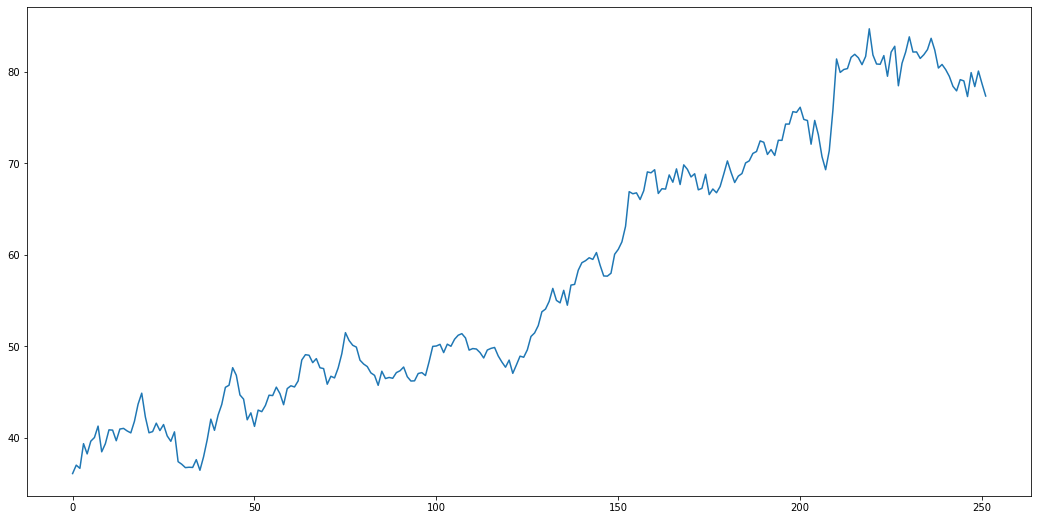

In [21]:
dataset['Open'].plot(figsize=(18, 9))

In [22]:
X  = dataset[['Open','High','Low','Volume']]
y = dataset['Close']

In [23]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X ,y , random_state = 0)

In [25]:
X_train.shape

(189, 4)

In [26]:
X_test.shape

(63, 4)

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
regressor = LinearRegression()

In [28]:
regressor.fit(X_train,y_train)

LinearRegression()

In [29]:
print(regressor.coef_)

[-5.91077849e-01  8.82324043e-01  7.08502308e-01 -6.03085341e-08]


In [30]:
print(regressor.intercept_)

0.07611183614171324


In [32]:
predicted=regressor.predict(X_test)
print(X_test)

          Open       High        Low   Volume
158  69.050003  69.250000  68.510002  1025200
83   46.799999  47.230000  46.169998  2879200
170  68.500000  68.610001  67.510002  1248700
101  50.189999  50.250000  49.439999  1050600
150  60.580002  61.680000  60.380001  1133500
..         ...        ...        ...      ...
221  80.849998  81.709999  80.839996   899200
15   40.720001  40.799999  39.700001  1757300
152  63.099998  63.970001  62.299999  2086400
74   49.160000  51.820000  48.970001  4134000
7    41.250000  41.509998  39.930000  1769000

[63 rows x 4 columns]


In [33]:
predicted.shape

(63,)

In [35]:
dframe=pd.DataFrame(y_test,predicted)
dfr=pd.DataFrame({'Actual':y_test,'Predicted':predicted})
print(dfr)

        Actual  Predicted
158  68.720001  68.840791
83   46.750000  46.623744
170  68.029999  67.879218
101  49.720001  49.711692
150  61.439999  61.401372
..         ...        ...
221  81.449997  81.603260
15   39.950001  40.027804
152  63.450001  63.235236
74   51.509998  51.186800
7    41.000000  40.503231

[63 rows x 2 columns]


In [36]:
dfr.head(25)

,Actual,Predicted
158,68.720001,68.840791
83,46.750000,46.623744
170,68.029999,67.879218
101,49.720001,49.711692
150,61.439999,61.401372
199,74.879997,74.988027
118,48.090000,47.676919
227,79.139999,78.665441
63,47.759998,48.062365
135,56.410000,56.457644


In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [38]:
regressor.score(X_test,y_test)

0.9990582656925028

In [39]:
import math

In [40]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,predicted))

Mean Absolute Error: 0.33292741370260515


In [41]:
print('Mean Squared  Error:',metrics.mean_squared_error(y_test,predicted))

Mean Squared  Error: 0.17048256634009312


In [42]:
print('Root Mean Squared Error:',math.sqrt(metrics.mean_squared_error(y_test,predicted)))

Root Mean Squared Error: 0.4128953455054841


<AxesSubplot:>

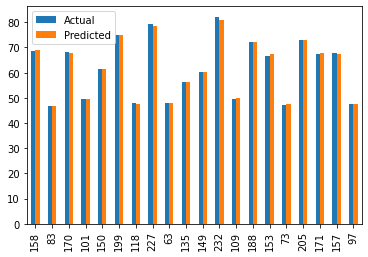

In [47]:
graph=dfr.head(20)
graph.plot(kind='bar')